The dataset for this analysis shows information for all the crash reported within the streets of Chicago between 2014-2019. Dataset contains 341,917 cases with up to 48 variables explaining the details about the crash situation.

Starting off with importing some libraries for better analysis.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

With importing the dataset, the most essential part is to get an idea of the overview and size using some summary statistics like head, tail, shape, and info to get a good idea of the variables. 

Converting the names of the columns to lower case helps with writing the code conveniently and display max columns to get the whole set.

In [69]:
data1 = pd.read_csv('traffic_crashes.csv',low_memory=False)

In [70]:
pd.set_option('display.max_columns', None)


In [71]:
data1.columns=map(str.lower, data1.columns)
data1.columns

Index(['rd_no', 'crash_date_est_i', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type', 'lane_cnt',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'intersection_related_i', 'not_right_of_way_i',
       'hit_and_run_i', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence',
       'photos_taken_i', 'statements_taken_i', 'dooring_i', 'work_zone_i',
       'work_zone_type', 'workers_present_i', 'num_units',
       'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'latitude', 'longitude

In [72]:
data1.head()

,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,JC446000,NaN,09/24/2019 02:40:00 AM,20,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",09/24/2019 02:58:00 AM,DISTRACTION - FROM OUTSIDE VEHICLE,UNABLE TO DETERMINE,4703,W,CONGRESS PKWY,1131.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,3,9,41.874029,-87.742796,POINT (-87.742795896581 41.874028533481)
1,JC445973,NaN,09/24/2019 01:55:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",09/24/2019 01:55:00 AM,UNABLE TO DETERMINE,FAILING TO REDUCE SPEED TO AVOID CRASH,4002,W,LAKE ST,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NONINCAPACITATING INJURY,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1,3,9,41.885583,-87.725998,POINT (-87.725998379042 41.885582689737)
2,JC445957,NaN,09/24/2019 01:15:00 AM,30,NO CONTROLS,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",09/24/2019 01:16:00 AM,NOT APPLICABLE,NOT APPLICABLE,4756,W,MC LEAN AVE,2522.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3,9,41.917955,-87.745953,POINT (-87.74595273649 41.917955330229)
3,JC445975,NaN,09/24/2019 01:09:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",09/24/2019 01:11:00 AM,PHYSICAL CONDITION OF DRIVER,NOT APPLICABLE,3414,W,PALMER ST,1413.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3,9,41.921105,-87.712647,POINT (-87.712647140225 41.921104828628)
4,JC445952,NaN,09/24/2019 12:45:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",09/24/2019 01:00:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,5304,S,WESTERN AVE,923.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,3,9,41.797284,-87.684270,POINT (-87.684270306345 41.797284289537)


In [73]:
data1.tail()

,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
341912,JC321679,NaN,06/25/2014 07:00:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",06/25/2019 05:50:00 PM,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,3132,S,PULASKI RD,1031.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,19,4,6,41.835886,-87.724474,POINT (-87.724474013253 41.835886103363)
341913,HZ164689,NaN,02/24/2014 07:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",02/25/2016 02:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,199,N,SACRAMENTO BLVD,1222.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,19,2,2,41.884016,-87.701143,POINT (-87.701142757538 41.884016475152)
341914,HZ122950,NaN,01/21/2014 07:40:00 AM,30,YIELD,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",01/21/2016 07:50:00 AM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,7400,S,EXCHANGE AVE,334.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,7,3,1,41.760710,-87.561946,POINT (-87.561946030143 41.760710194223)
341915,JB442550,NaN,01/18/2014 06:14:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/19/2018 07:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,415,W,LAKE ST,121.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,7,1,41.885610,-87.638756,POINT (-87.638756189808 41.885609917063)
341916,JC172482,NaN,03/03/2013 04:48:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,2,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,Y,"OVER $1,500",03/03/2019 04:49:00 PM,IMPROPER LANE USAGE,DISREGARDING ROAD MARKINGS,3200,W,FOSTER AVE,1712.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"REPORTED, NOT EVIDENT",2.0,0.0,0.0,0.0,2.0,1.0,0.0,16,1,3,41.975857,-87.708744,POINT (-87.708743641643 41.975856915535)


In [74]:
data1.shape

(341917, 48)

In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341917 entries, 0 to 341916
Data columns (total 48 columns):
rd_no                            341917 non-null object
crash_date_est_i                 25609 non-null object
crash_date                       341917 non-null object
posted_speed_limit               341917 non-null int64
traffic_control_device           341917 non-null object
device_condition                 341917 non-null object
weather_condition                341917 non-null object
lighting_condition               341917 non-null object
first_crash_type                 341917 non-null object
trafficway_type                  341917 non-null object
lane_cnt                         198544 non-null object
alignment                        341917 non-null object
roadway_surface_cond             341917 non-null object
road_defect                      341917 non-null object
report_type                      334198 non-null object
crash_type                       341917 non-null ob

Just to start off with analysis, there may be a trend with most accidents occurring in the areas with a speed posting of about 30 mph. I also made a random sample and tried to plot it with the actual data to see if that changes. 

In [76]:
random.seed(2019)
data2=data1.sample(n=20000)

In [77]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 338879 to 91853
Data columns (total 48 columns):
rd_no                            20000 non-null object
crash_date_est_i                 1524 non-null object
crash_date                       20000 non-null object
posted_speed_limit               20000 non-null int64
traffic_control_device           20000 non-null object
device_condition                 20000 non-null object
weather_condition                20000 non-null object
lighting_condition               20000 non-null object
first_crash_type                 20000 non-null object
trafficway_type                  20000 non-null object
lane_cnt                         11534 non-null object
alignment                        20000 non-null object
roadway_surface_cond             20000 non-null object
road_defect                      20000 non-null object
report_type                      19544 non-null object
crash_type                       20000 non-null object
intersec

In [89]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
posted_speed_limit,20000.0,28.156600,6.887913,0.000000,30.000000,30.000000,30.000000,99.000000
street_no,20000.0,3571.638150,2824.866097,1.000000,1147.000000,3100.000000,5501.000000,13770.000000
beat_of_occurrence,20000.0,1239.803050,709.232398,111.000000,712.000000,1214.000000,1824.000000,2535.000000
num_units,19936.0,2.019613,0.405835,1.000000,2.000000,2.000000,2.000000,9.000000
injuries_total,19896.0,0.159530,0.516511,0.000000,0.000000,0.000000,0.000000,8.000000
injuries_fatal,19896.0,0.001005,0.040093,0.000000,0.000000,0.000000,0.000000,3.000000
injuries_incapacitating,19896.0,0.017692,0.155614,0.000000,0.000000,0.000000,0.000000,4.000000
injuries_non_incapacitating,19896.0,0.087304,0.376179,0.000000,0.000000,0.000000,0.000000,7.000000
injuries_reported_not_evident,19896.0,0.053528,0.290071,0.000000,0.000000,0.000000,0.000000,7.000000
injuries_no_indication,19896.0,2.028548,1.238362,0.000000,1.000000,2.000000,2.000000,61.000000


<function matplotlib.pyplot.show(*args, **kw)>

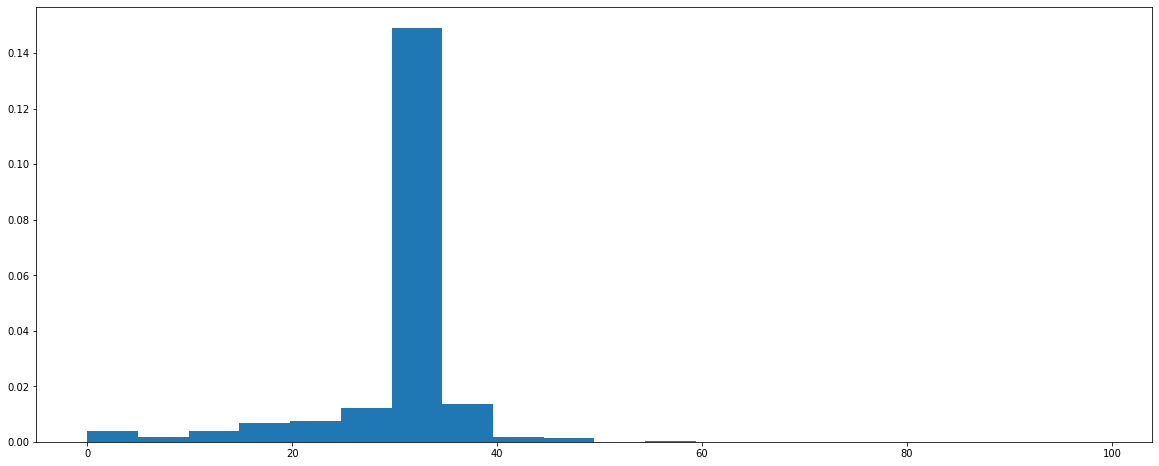

In [90]:
plt.figure(figsize = (20,8))
plt.hist(data1.posted_speed_limit.dropna(), bins = 20, density = True, cumulative= False)
plt.show

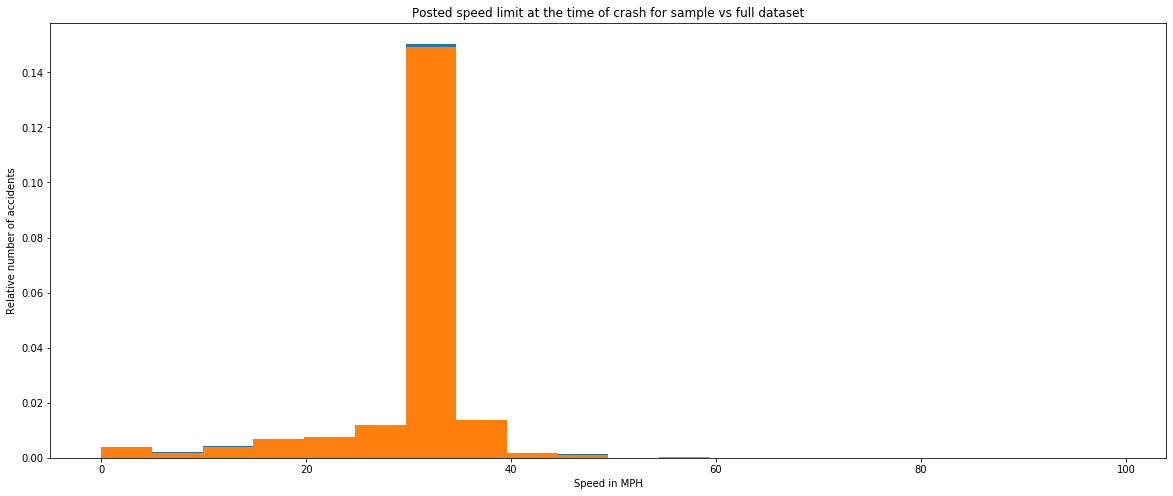

In [80]:
plt.figure(figsize = (20,8))
plt.hist(data2.posted_speed_limit.dropna(), bins = 20, density = True, cumulative= False)
plt.hist(data1.posted_speed_limit.dropna(), bins = 20, density = True, cumulative= False)
plt.title('Posted speed limit at the time of crash for sample vs full dataset')
plt.xlabel('Speed in MPH')
plt.ylabel('Relative number of accidents')
plt.show()

The little blue lines can be seen on top the orange bar showing that the trend is almost the same for posted speeds at crash locations.

Weather condition has a very substantial part in the occurrence of an accident. I want to see if it is more likely for an accident to happen in a specific weather condition.


In [81]:
data1['weather_condition'].unique()

array(['CLEAR', 'UNKNOWN', 'RAIN', 'OTHER', 'CLOUDY/OVERCAST',
       'FREEZING RAIN/DRIZZLE', 'SNOW', 'FOG/SMOKE/HAZE', 'SLEET/HAIL',
       'SEVERE CROSS WIND GATE', 'BLOWING SNOW'], dtype=object)

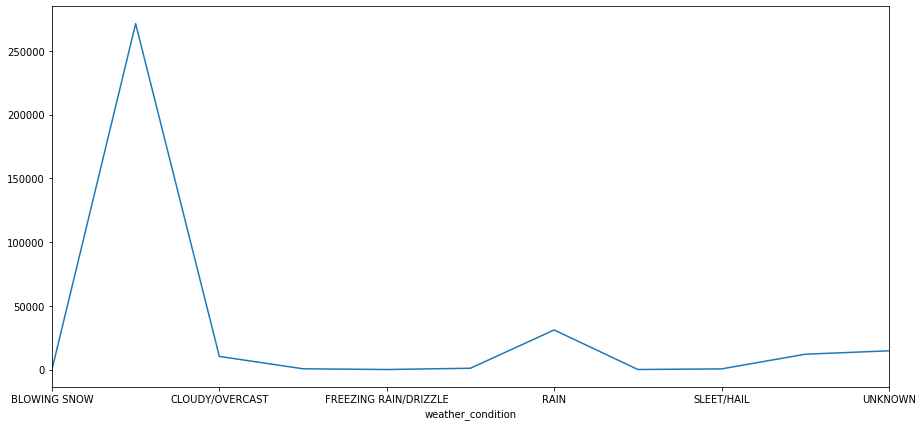

In [82]:
crash_w=data1.groupby(['weather_condition']).size().plot(figsize=(15,7))


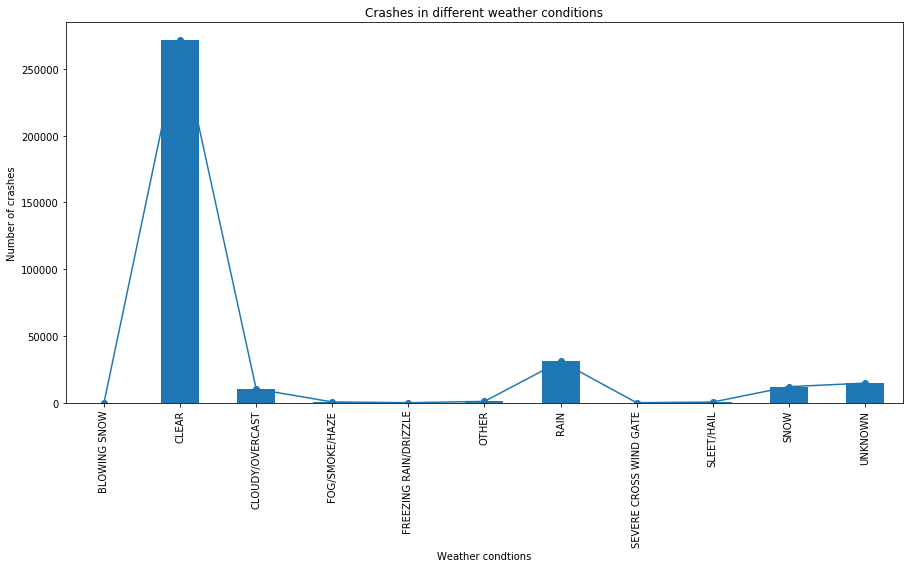

In [83]:
crash=data1.groupby('weather_condition').size().plot(
    figsize=(15,7),linestyle='-', marker='o')
data1.groupby('weather_condition').size().plot( kind='bar',ax=crash)
plt.title('Crashes in different weather conditions')
plt.xlabel('Weather condtions')
plt.ylabel('Number of crashes')
plt.show()


The combines plot shows the vales of the accident through different weather conditions and the line plot was included to just better visualize the shift in the numbers.

The barplot helps us infer that most accidents took place on the clear day. My take on this would be that people are generally more careful while driving on a rainy or snow day and more likely to crash on a clear day when it is not expected.

Crash hour is a useful predictor that gives us an idea of the time of the day which has the most likeliness for accidents to happen.

In [84]:
data1['crash_hour'].unique()

array([ 2,  1,  0, 23, 22, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3, 21], dtype=int64)

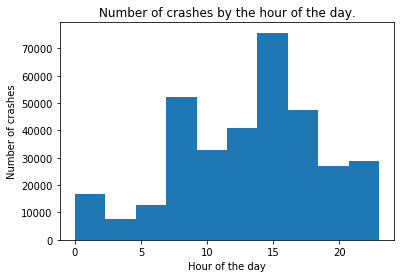

In [85]:
plt.hist(data1.crash_hour.dropna(), density = False, cumulative= False)
plt.xlabel('Hour of the day')
plt.ylabel('Number of crashes')
plt.title('Number of crashes by the hour of the day.')
plt.show()

As can be observed from the above, most of the crashes occur in the evening during rush hour. The second highest is the morning rush hour. This could be a consistent trend. 

A heatmap of the crashes throughout the week vs the time of the day could better visualize if this trend exists.

In [86]:
data1['crash_day_of_week'].unique() 

array([3, 2, 1, 7, 6, 5, 4], dtype=int64)

In [87]:
crash_data=data1.groupby(['crash_day_of_week', 'crash_hour']).size().reset_index(name='count')

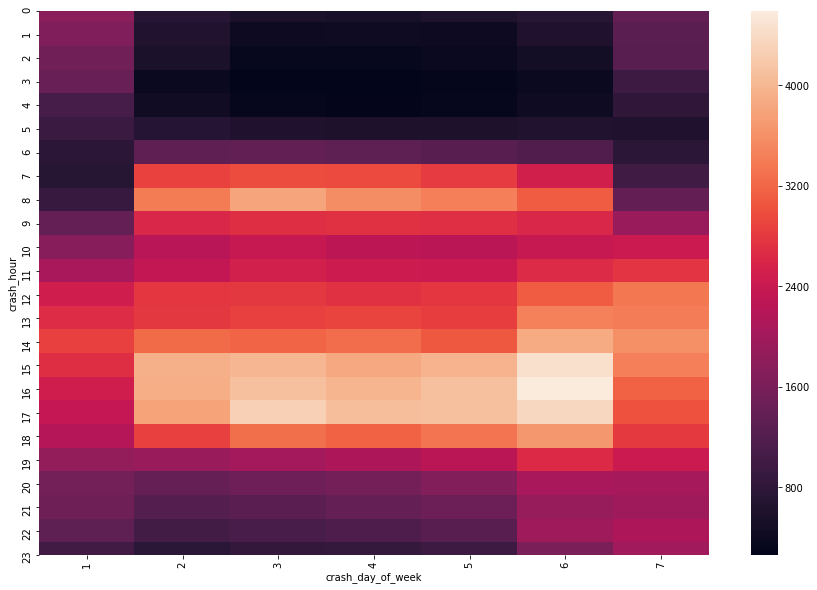

In [88]:
crash_heat = pd.pivot_table(data=crash_data, values="count",index=["crash_hour"], columns=["crash_day_of_week"], fill_value=0)
#plot pivot table as heatmap using seaborn
fig, cx=plt.subplots(figsize=(15,10))
cx = sns.heatmap(crash_heat, square=False)
plt.setp( cx.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

The heatmap shows an explicit image of the accurate correlation between time of the day and the day of the week. Day 1 refers to Monday and onwards. 

Conclusion:
It can be inferred from the above visualizations that the highest number of crashes should be expected within the weekdays, amid rush hours. Evening rush hours can have a higher number as observed in the data from the previous six years with friday evening 3-5pm being the highest. Morning rush hours are just a little behind with fewer number of crashes. 
Over the weekend, most accidents are likely to happen around 2pm. 

This data should be used to spread awareness amongst residents and commuters to be more careful even on clear days around these times and authorities can cope with better planning for avoiding these situations and being more responsive in the above mentioned days/hours for immediate support. This might have a good impact on the traffic conditions too, which can minimize the number of road accidents drastically. 